# Orsted energy production data exploration

## Load data

In [39]:
import pandas as pd

# set pandas to max rows and columns
pd.set_option('display.max_rows', 20)
#pd.set_option('display.max_columns', None)

In [40]:
import pandas as pd

# Define path 
path = r"C:\Users\viet-intel\orsted_projekt\data\input\Nordic_power_plants.csv"

# Load csv as dataframe
energy_rawdata = pd.read_csv(path, encoding='iso-8859-1')

# print first 5 rows
display(energy_rawdata)


,Unnamed: 0,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,start date,owner of plant,estimated_generation_gwh_2021;;
0,9895,DNK,Denmark,Aalborg,16.6,57.2544,9.9886,Solar,NaN,NaN,24.37;;
1,9896,DNK,Denmark,Amager,14.0,55.6899,12.6330,Geothermal,NaN,Ørsted,;;
2,9897,DNK,Denmark,Amager power station,330.0,55.6859,12.6277,Coal,1982.0,HOFOR A/S,;;
3,9898,DNK,Denmark,Anholt,399.6,56.6030,11.2090,Wind,2013.0,50% Ørsted,;;
4,9899,DNK,Denmark,Asnæs power station,787.0,55.6615,11.0809,Coal,1975.0,Ørsted,;;
...,...,...,...,...,...,...,...,...,...,...,...
701,21201,SWE,Sweden,Viforsen,10.0,62.3000,17.1667,Hydro,1982.0,100% Statkraft,46.65;;
702,21202,SWE,Sweden,Vittjarv,33.0,65.8453,21.5545,Hydro,NaN,100% Vattenfall,132.39;;
703,21203,SWE,Sweden,Volgsjofors,20.0,64.5500,16.7500,Hydro,1980.0,100% Statkraft,88.74;;
704,21204,SWE,Sweden,VÃ¤rme,639.0,59.3532,18.0985,Gas,1980.0,Fortum,;;


## Data cleaning

Datatypes

In [41]:
# Print dtypes
print(energy_rawdata.dtypes)

Unnamed: 0                           int64
country code                        object
country_long                        object
name of powerplant                  object
capacity in MW                     float64
latitude                           float64
longitude                          float64
primary_fuel                        object
start date                         float64
owner of plant                      object
estimated_generation_gwh_2021;;     object
dtype: object


String replacement

In [42]:
import numpy as np

# Removing ';;' from the 'estimated_generation_gwh_2021;;' column
energy_rawdata['estimated_generation_gwh_2021;;'] = energy_rawdata['estimated_generation_gwh_2021;;'].str.replace(';', '')

# Set all empty values for all columns to NaN
energy_rawdata = energy_rawdata.replace(r'', np.nan, regex=True)



Renaming columns

In [43]:
# Rename the column 
energy_rawdata.rename(columns={'estimated_generation_gwh_2021;;':'estimated_generation_gwh_2021'}, inplace=True)
energy_rawdata.rename(columns={'country code':'country_code'}, inplace=True)
energy_rawdata.rename(columns={'name of powerplant':'name_of_powerplant'}, inplace=True)
energy_rawdata.rename(columns={'capacity in MW':'capacity_in_MW'}, inplace=True)
energy_rawdata.rename(columns={'Unnamed: 0':'index'}, inplace=True)

# printing the data
energy_rawdata

,index,country_code,country_long,name_of_powerplant,capacity_in_MW,latitude,longitude,primary_fuel,start date,owner of plant,estimated_generation_gwh_2021
0,9895,DNK,Denmark,Aalborg,16.6,57.2544,9.9886,Solar,NaN,NaN,24.37
1,9896,DNK,Denmark,Amager,14.0,55.6899,12.6330,Geothermal,NaN,Ørsted,NaN
2,9897,DNK,Denmark,Amager power station,330.0,55.6859,12.6277,Coal,1982.0,HOFOR A/S,NaN
3,9898,DNK,Denmark,Anholt,399.6,56.6030,11.2090,Wind,2013.0,50% Ørsted,NaN
4,9899,DNK,Denmark,Asnæs power station,787.0,55.6615,11.0809,Coal,1975.0,Ørsted,NaN
...,...,...,...,...,...,...,...,...,...,...,...
701,21201,SWE,Sweden,Viforsen,10.0,62.3000,17.1667,Hydro,1982.0,100% Statkraft,46.65
702,21202,SWE,Sweden,Vittjarv,33.0,65.8453,21.5545,Hydro,NaN,100% Vattenfall,132.39
703,21203,SWE,Sweden,Volgsjofors,20.0,64.5500,16.7500,Hydro,1980.0,100% Statkraft,88.74
704,21204,SWE,Sweden,VÃ¤rme,639.0,59.3532,18.0985,Gas,1980.0,Fortum,NaN


In [44]:
# Convert 'estimated_generation_gwh_2021' column to float
energy_rawdata['estimated_generation_gwh_2021'] = energy_rawdata['estimated_generation_gwh_2021'].astype(float)

# Making a copy of the raw data
energy_cleaned = energy_rawdata.copy()

# display(energy_rawdata.info()) and lenght
print(len(energy_cleaned))
energy_cleaned.head()

706


,index,country_code,country_long,name_of_powerplant,capacity_in_MW,latitude,longitude,primary_fuel,start date,owner of plant,estimated_generation_gwh_2021
0,9895,DNK,Denmark,Aalborg,16.6,57.2544,9.9886,Solar,NaN,NaN,24.37
1,9896,DNK,Denmark,Amager,14.0,55.6899,12.6330,Geothermal,NaN,Ørsted,NaN
2,9897,DNK,Denmark,Amager power station,330.0,55.6859,12.6277,Coal,1982.0,HOFOR A/S,NaN
3,9898,DNK,Denmark,Anholt,399.6,56.6030,11.2090,Wind,2013.0,50% Ørsted,NaN
4,9899,DNK,Denmark,Asnæs power station,787.0,55.6615,11.0809,Coal,1975.0,Ørsted,NaN


## Null-values

In [45]:
# Calculate the number of null values for each column
null_count = energy_cleaned.isnull().sum()

# Calculate the percentage of null values for each column
total_rows = len(energy_cleaned)
null_percentage = (null_count / total_rows) * 100

# Create a DataFrame to display the results
null_summary = pd.DataFrame({'Null Count': null_count, 'Null Percentage': null_percentage})

# Print the result
null_summary.sort_values(by='Null Percentage', ascending=False)

,Null Count,Null Percentage
start date,544,77.053824
owner of plant,337,47.733711
estimated_generation_gwh_2021,155,21.954674
index,0,0.000000
country_code,0,0.000000
country_long,0,0.000000
name_of_powerplant,0,0.000000
capacity_in_MW,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


### Null values gruoped by primary_fuel

In [46]:
# Group by 'primary_fuel' column
grouped_fuel = energy_cleaned.groupby('primary_fuel')

# Calculate the percentage of null values in each group
null_percentage = grouped_fuel.apply(lambda x: (x.isnull().sum() / len(x)) * 100)

# Add an extra column to count the number of grouped values
null_percentage['All_instances_count_est21'] = grouped_fuel['primary_fuel'].count()

# Add an extra column to count the number of non-null values in estimated_generation_gwh_2021
null_percentage['non_null_count_est21'] = grouped_fuel['estimated_generation_gwh_2021'].count()

# Add an extra column to count the number of null values in estimated_generation_gwh_2021
null_percentage['null_count_est21'] = null_percentage['All_instances_count_est21'] - null_percentage['non_null_count_est21']

# Sort the values by the percentage of null values in descending order
null_percentage.sort_values(by='estimated_generation_gwh_2021', ascending=False)

,index,country_code,country_long,name_of_powerplant,capacity_in_MW,latitude,longitude,primary_fuel,start date,owner of plant,estimated_generation_gwh_2021,All_instances_count_est21,non_null_count_est21,null_count_est21
primary_fuel,,,,,,,,,,,,,,
Biomass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.500000,8.333333,100.000000,48,0,48
Coal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.750000,12.500000,100.000000,16,0,16
Gas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.285714,35.714286,100.000000,28,0,28
Geothermal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,100.000000,1,0,1
Nuclear,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,20.000000,100.000000,5,0,5
Oil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,15.384615,100.000000,13,0,13
Other,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,100.000000,4,0,4
Wind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.862745,27.450980,62.745098,51,19,32
Solar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.333333,83.333333,16.666667,12,10,2


In [47]:
# Creating total col count
col1 = null_percentage['All_instances_count_est21'].sum()
col2 = null_percentage['non_null_count_est21'].sum()
col3 = null_percentage['null_count_est21'].sum()
col4 = (null_percentage['null_count_est21'].sum() / null_percentage['All_instances_count_est21'].sum()) * 100

# Creating dataframe
est_energy_total_null = pd.DataFrame({'All_instances_count_est21': [col1], 'non_null_count_est21': [col2], 'null_count_est21': [col3], 'null_percentage_est21': [col4]})

# display
est_energy_total_null

,All_instances_count_est21,non_null_count_est21,null_count_est21,null_percentage_est21
0,706,551,155,21.954674


### Null values grouped by country

In [48]:
# Group by 'country_long' column
grouped_fuel = energy_cleaned.groupby('country_long')

# Calculate the percentage of null values in each group
null_percentage = grouped_fuel.apply(lambda x: (x.isnull().sum() / len(x)) * 100)

# Add an extra column to count the number of grouped values
null_percentage['All_instances_count_est21'] = grouped_fuel['country_long'].count()

# Add an extra column to count the number of non-null values in estimated_generation_gwh_2021
null_percentage['non_null_count_est21'] = grouped_fuel['estimated_generation_gwh_2021'].count()

# Add an extra column to count the number of null values in estimated_generation_gwh_2021
null_percentage['null_count_est21'] = null_percentage['All_instances_count_est21'] - null_percentage['non_null_count_est21']

# Sort the values by the percentage of null values in descending order
null_percentage.sort_values(by='estimated_generation_gwh_2021', ascending=False)

,index,country_code,country_long,name_of_powerplant,capacity_in_MW,latitude,longitude,primary_fuel,start date,owner of plant,estimated_generation_gwh_2021,All_instances_count_est21,non_null_count_est21,null_count_est21
country_long,,,,,,,,,,,,,,
Finland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.459459,0.000000,51.351351,185,90,95
Denmark,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.425532,42.553191,46.808511,47,25,22
Sweden,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.833333,6.547619,13.095238,168,146,22
Norway,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,100.000000,5.228758,306,290,16


## Data Exploration

In [49]:
# describe cleaned data
energy_cleaned.describe()

,index,capacity_in_MW,latitude,longitude,start date,estimated_generation_gwh_2021
count,706.000000,706.000000,706.000000,706.000000,162.000000,551.000000
mean,16168.079320,111.687904,61.829831,15.720757,1969.450617,319.721797
std,4392.954804,272.454011,3.272969,7.309590,25.927288,554.017245
min,9895.000000,1.000000,54.522800,5.037400,1906.000000,3.400000
25%,10234.250000,10.000000,59.825750,9.210900,1955.000000,35.380000
50%,17986.500000,38.450000,61.296800,14.832900,1968.500000,134.930000
75%,18162.750000,107.750000,63.750000,22.168725,1987.000000,403.385000
max,21205.000000,3932.000000,71.010900,30.700000,2016.000000,5614.820000


### Histogram of current capacity and estimated capacity

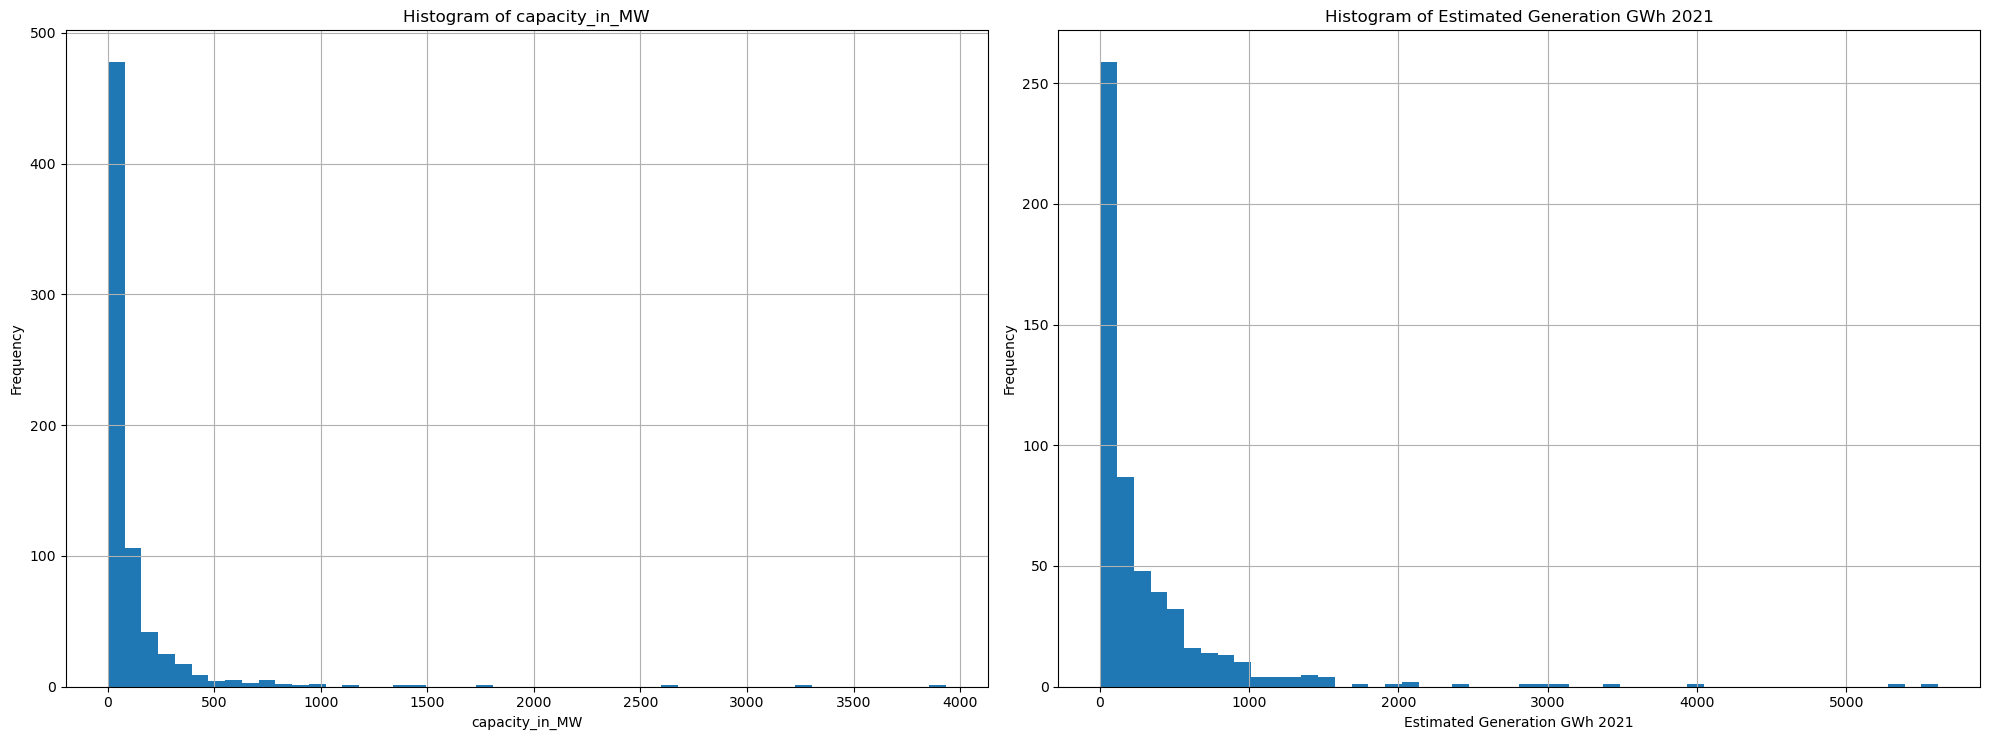

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7.5))

# Plot histogram on the first subplot
energy_cleaned['capacity_in_MW'].hist(bins=50, ax=axes[0])
axes[0].set_title('Histogram of capacity_in_MW')
axes[0].set_xlabel('capacity_in_MW')
axes[0].set_ylabel('Frequency')

# Plot histogram on the second subplot
energy_cleaned['estimated_generation_gwh_2021'].hist(bins=50, ax=axes[1])
axes[1].set_title('Histogram of Estimated Generation GWh 2021')
axes[1].set_xlabel('Estimated Generation GWh 2021')
axes[1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


### Scatter plot capactiy as x and estimated_generation as y

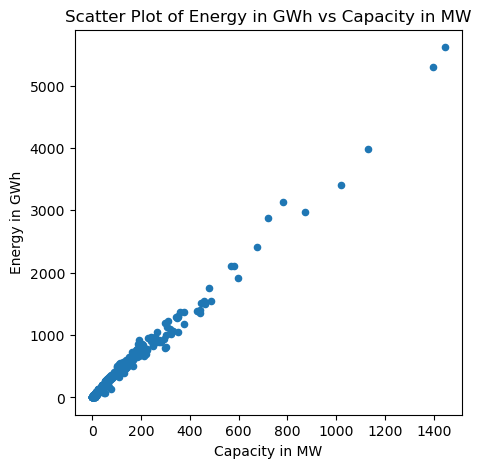

In [13]:
# plotting capacity_in_MW as x and energy_in_GWh as y
energy_cleaned.plot(kind="scatter", x='capacity_in_MW', y='estimated_generation_gwh_2021', figsize=(5, 5))
plt.title('Scatter Plot of Energy in GWh vs Capacity in MW')
plt.xlabel('Capacity in MW')
plt.ylabel('Energy in GWh')
plt.show()

### Historgram of the capacity factor measured in percentage

<Axes: >

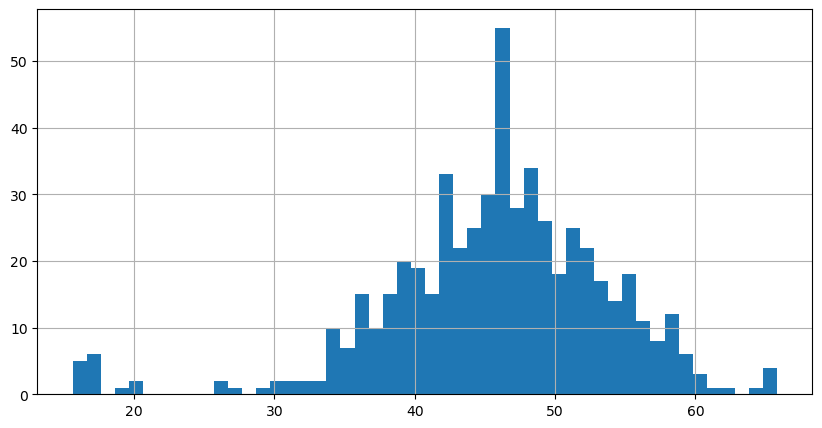

In [14]:
# Defining variables
capacity = energy_cleaned['capacity_in_MW']
ets2021 = energy_cleaned['estimated_generation_gwh_2021']

# Creating capacity factor dataframe
capacity_factor = (ets2021/((capacity*24*365)/1000))*100

capacity_factor.hist(bins=50, figsize=(10, 5))

In [15]:
# describe the data
print(capacity_factor.describe())

# print the std divided by the mean
print(capacity_factor.std() / capacity_factor.mean() * 100)


count    551.000000
mean      45.745401
std        8.119385
min       15.634793
25%       41.804531
50%       46.109006
75%       51.021543
max       65.823674
dtype: float64
17.74907446468355


In [16]:
# Looking for correlations
corr_matrix = energy_cleaned.corr()

corr_matrix["capacity_in_MW"].sort_values(ascending=False)

C:\Users\viet-intel\AppData\Local\Temp\ipykernel_11656\3247426165.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = energy_cleaned.corr()


capacity_in_MW                   1.000000
estimated_generation_gwh_2021    0.994376
index                            0.084866
start date                       0.020190
longitude                       -0.091325
latitude                        -0.121799
Name: capacity_in_MW, dtype: float64

### Filling Null Values with linear regression

Divide the dataset into a null value dataset and a non-null value dataset

In [17]:
# create linear regression model from data
model_values = energy_cleaned[['index', 'capacity_in_MW', 'estimated_generation_gwh_2021']]

# Selecting only rows with no null values
no_null_data = model_values.dropna()

# Selecting only rows with null values
null_data = model_values[model_values.isnull().any(axis=1)]

# print lenght of dataframes null and not null
print('Lenght of no_null_data:', len(no_null_data))
print('Lenght of null_data:', len(null_data))
print('Total:', len(no_null_data)+len(null_data))

Lenght of no_null_data: 551
Lenght of null_data: 155
Total: 706


Create Model from non_null values

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
x_non_null = no_null_data[['capacity_in_MW']]
y_non_null = no_null_data['estimated_generation_gwh_2021']

# Create and train the linear regression model
model = LinearRegression()
model.fit(x_non_null, y_non_null)

# Make predictions using the model
y_pred = model.predict(x_non_null)

# Calculate RMSE
mse = mean_squared_error(y_non_null, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_non_null, y_pred)

# Create a DataFrame to display the results in a table
linreg_results_nn = pd.DataFrame({
    'Metric': ['RMSE', 'R-squared'],
    'Value': [rmse, r2]
})

linreg_results_nn


,Metric,Value
0,RMSE,58.620616
1,R-squared,0.988784


Fill Null values from from linear regression model from non-null values

In [19]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(x_non_null, y_non_null)

# Make predictions using the model for null_data
X_null = null_data[['capacity_in_MW']]
y_null_pred = model.predict(X_null)

# Fill null_data with the predicted values
null_data_est = null_data.copy()
null_data_est['estimated_generation_gwh_2021'] = y_null_pred

# Concatenate no_null_data and null_data_est
est21_linereg = pd.concat([no_null_data, null_data_est])

# Display the combined DataFrame
display(est21_linereg)


,index,capacity_in_MW,estimated_generation_gwh_2021
0,9895,16.6,24.370000
6,9901,11.0,31.460000
7,9902,10.0,15.040000
8,9903,10.0,14.840000
9,9904,9.2,31.140000
...,...,...,...
694,21194,130.0,481.865988
696,21196,80.0,301.404315
699,21199,130.0,481.865988
704,21204,639.0,2318.965826


Create new regression with new estimated 2021 gen data from regression

In [20]:
# Prepare the data
x_est21 = est21_linereg[['capacity_in_MW']]
y_est21 = est21_linereg['estimated_generation_gwh_2021']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x_est21, y_est21)

# Make predictions using the model
y_pred = model.predict(x_est21)

# Calculate RMSE
mse = mean_squared_error(y_est21, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_est21, y_pred)

# Create a DataFrame to display the results
results_est21_linreg = pd.DataFrame({
    'Metric': ['RMSE', 'R-squared'],
    'Value': [rmse, r2]
})

results_est21_linreg

,Metric,Value
0,RMSE,51.787366
1,R-squared,0.997230


### Null values replaced with mean values

In [21]:
# Create a copy of the DataFrame
mean_nan_fill = model_values.copy()

# Calculate the mean of 'estimated_generation_gwh_2021'
mean_value = mean_nan_fill['estimated_generation_gwh_2021'].mean()

# Fill missing values with the mean while keeping other columns
mean_nan_fill['estimated_generation_gwh_2021'].fillna(mean_value, inplace=True)


# Checks if there are any missing values
print(mean_nan_fill.isnull().sum())
print(len(mean_nan_fill))

# Shows the first 5 rows of the dataframe
display(mean_nan_fill)

index                            0
capacity_in_MW                   0
estimated_generation_gwh_2021    0
dtype: int64
706


,index,capacity_in_MW,estimated_generation_gwh_2021
0,9895,16.6,24.370000
1,9896,14.0,319.721797
2,9897,330.0,319.721797
3,9898,399.6,319.721797
4,9899,787.0,319.721797
...,...,...,...
701,21201,10.0,46.650000
702,21202,33.0,132.390000
703,21203,20.0,88.740000
704,21204,639.0,319.721797


Regression model on mean NaN replacement

In [22]:
# Prepare the data
x_mean = mean_nan_fill[['capacity_in_MW']]
y_mean = mean_nan_fill['estimated_generation_gwh_2021']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x_mean, y_mean)

# Make predictions using the model
y_pre_mean = model.predict(x_mean)

# Calculate RMSE
mse = mean_squared_error(y_mean, y_pre_mean)
rmse_mean = np.sqrt(mse)

# Calculate R-squared
r2_mean = r2_score(y_mean, y_pre_mean)

# Create a DataFrame to display the results
results_est21_mean = pd.DataFrame({
    'Metric': ['RMSE', 'R-squared'],
    'Value': [rmse_mean, r2_mean]
})

results_est21_mean

,Metric,Value
0,RMSE,425.702654
1,R-squared,0.242107


### Regression model: NaN replaced by mean capacity factor 

In [23]:
# Defining the capacity factor mean
cap_mean = capacity_factor.mean()/100

# replaceing the missing values with the cap fac mean
capacity = model_values['capacity_in_MW']

# Calculate the value to fill
fill_value = (cap_mean * capacity * 24 * 365) / 1000

# Create a new DataFrame with replaced values
cap_mean_replacement = model_values.copy()
cap_mean_replacement['estimated_generation_gwh_2021'] = model_values['estimated_generation_gwh_2021'].fillna(fill_value)


# Fill missing values with the mean while keeping other columns
mean_nan_fill['estimated_generation_gwh_2021'].fillna(mean_value, inplace=True)


# Checks if there are any missing values
print(mean_nan_fill.isnull().sum())
print(len(mean_nan_fill))

# Shows the first 5 rows of the dataframe
cap_mean_replacement



index                            0
capacity_in_MW                   0
estimated_generation_gwh_2021    0
dtype: int64
706


,index,capacity_in_MW,estimated_generation_gwh_2021
0,9895,16.6,24.370000
1,9896,14.0,56.102159
2,9897,330.0,1322.408043
3,9898,399.6,1601.315921
4,9899,787.0,3153.742818
...,...,...,...
701,21201,10.0,46.650000
702,21202,33.0,132.390000
703,21203,20.0,88.740000
704,21204,639.0,2560.662847


Regression model  

In [24]:
# Prepare the data
x_cap_mean = cap_mean_replacement[['capacity_in_MW']]
y_cap_mean = cap_mean_replacement['estimated_generation_gwh_2021']

# Create and fit the linear regression model_cap_mean
model_cap_mean = LinearRegression()
model_cap_mean.fit(x_cap_mean, y_cap_mean)

# Make predictions using the model_cap_mean
y_pre_cap_mean = model_cap_mean.predict(x_cap_mean)

# Calculate RMSE
mse = mean_squared_error(y_cap_mean, y_pre_cap_mean)
rmse_mean = np.sqrt(mse)

# Calculate R-squared
r2_mean = r2_score(y_cap_mean, y_pre_cap_mean)

# Create a DataFrame to display the results
results_est21_cap_mean = pd.DataFrame({
    'Metric': ['RMSE', 'R-squared'],
    'Value': [rmse_mean, r2_mean]
})

results_est21_cap_mean

,Metric,Value
0,RMSE,70.809037
1,R-squared,0.995608


### All replacement model results

In [38]:
# Concatenate the DataFrames
results_all = pd.concat([results_est21_mean, results_est21_linreg, results_est21_cap_mean], axis=1)

# Set new column names
results_all.columns = ['Metric_mean', 'Value_mean', 'Metric_linreg', 'Value_linreg', 'Metric_cap_mean', 'Value_cap_mean']

# Print the new DataFrame
display(results_all[['Metric_mean', 'Value_mean', 'Value_linreg', 'Value_cap_mean' ]])

# Describe energy_cleaned
energy_cleaned[[ 'capacity_in_MW', 'estimated_generation_gwh_2021']].describe()


,Metric_mean,Value_mean,Value_linreg,Value_cap_mean
0,RMSE,425.702654,51.787366,70.809037
1,R-squared,0.242107,0.997230,0.995608


,capacity_in_MW,estimated_generation_gwh_2021
count,706.000000,551.000000
mean,111.687904,319.721797
std,272.454011,554.017245
min,1.000000,3.400000
25%,10.000000,35.380000
50%,38.450000,134.930000
75%,107.750000,403.385000
max,3932.000000,5614.820000


### Creating final 2021 estimation dataframe

In [26]:
print(energy_cleaned.columns.tolist())

['index', 'country_code', 'country_long', 'name_of_powerplant', 'capacity_in_MW', 'latitude', 'longitude', 'primary_fuel', 'start date', 'owner of plant', 'estimated_generation_gwh_2021']


In [27]:
# Defining first join from orginal dataset
energy_cleaned_join = energy_cleaned[['index', 'country_code', 'country_long', 'name_of_powerplant', 'latitude', 'longitude', 'primary_fuel', 'start date', 'owner of plant']]

# Defining second join
est21_linereg_join = est21_linereg.copy()

# Making a inner join the two datasets on the index column
final_dataframe = pd.merge(energy_cleaned_join, est21_linereg_join, on='index', how='inner')

# displaying the first rows of the final dataframe
display(est21_linereg_join.sort_values(by='index'))
display(energy_cleaned_join.sort_values(by='index'))
display(final_dataframe.sort_values(by='index'))

,index,capacity_in_MW,estimated_generation_gwh_2021
0,9895,16.6,24.370000
1,9896,14.0,63.194905
2,9897,330.0,1203.712683
3,9898,399.6,1454.915333
4,9899,787.0,2853.132380
...,...,...,...
701,21201,10.0,46.650000
702,21202,33.0,132.390000
703,21203,20.0,88.740000
704,21204,639.0,2318.965826


,index,country_code,country_long,name_of_powerplant,latitude,longitude,primary_fuel,start date,owner of plant
0,9895,DNK,Denmark,Aalborg,57.2544,9.9886,Solar,NaN,NaN
1,9896,DNK,Denmark,Amager,55.6899,12.6330,Geothermal,NaN,Ørsted
2,9897,DNK,Denmark,Amager power station,55.6859,12.6277,Coal,1982.0,HOFOR A/S
3,9898,DNK,Denmark,Anholt,56.6030,11.2090,Wind,2013.0,50% Ørsted
4,9899,DNK,Denmark,Asnæs power station,55.6615,11.0809,Coal,1975.0,Ørsted
...,...,...,...,...,...,...,...,...,...
701,21201,SWE,Sweden,Viforsen,62.3000,17.1667,Hydro,1982.0,100% Statkraft
702,21202,SWE,Sweden,Vittjarv,65.8453,21.5545,Hydro,NaN,100% Vattenfall
703,21203,SWE,Sweden,Volgsjofors,64.5500,16.7500,Hydro,1980.0,100% Statkraft
704,21204,SWE,Sweden,VÃ¤rme,59.3532,18.0985,Gas,1980.0,Fortum


,index,country_code,country_long,name_of_powerplant,latitude,longitude,primary_fuel,start date,owner of plant,capacity_in_MW,estimated_generation_gwh_2021
0,9895,DNK,Denmark,Aalborg,57.2544,9.9886,Solar,NaN,NaN,16.6,24.370000
1,9896,DNK,Denmark,Amager,55.6899,12.6330,Geothermal,NaN,Ørsted,14.0,63.194905
2,9897,DNK,Denmark,Amager power station,55.6859,12.6277,Coal,1982.0,HOFOR A/S,330.0,1203.712683
3,9898,DNK,Denmark,Anholt,56.6030,11.2090,Wind,2013.0,50% Ørsted,399.6,1454.915333
4,9899,DNK,Denmark,Asnæs power station,55.6615,11.0809,Coal,1975.0,Ørsted,787.0,2853.132380
...,...,...,...,...,...,...,...,...,...,...,...
701,21201,SWE,Sweden,Viforsen,62.3000,17.1667,Hydro,1982.0,100% Statkraft,10.0,46.650000
702,21202,SWE,Sweden,Vittjarv,65.8453,21.5545,Hydro,NaN,100% Vattenfall,33.0,132.390000
703,21203,SWE,Sweden,Volgsjofors,64.5500,16.7500,Hydro,1980.0,100% Statkraft,20.0,88.740000
704,21204,SWE,Sweden,VÃ¤rme,59.3532,18.0985,Gas,1980.0,Fortum,639.0,2318.965826


## Grouped visualizations

### Sum, mean and count of grouped primary fuel and capacity

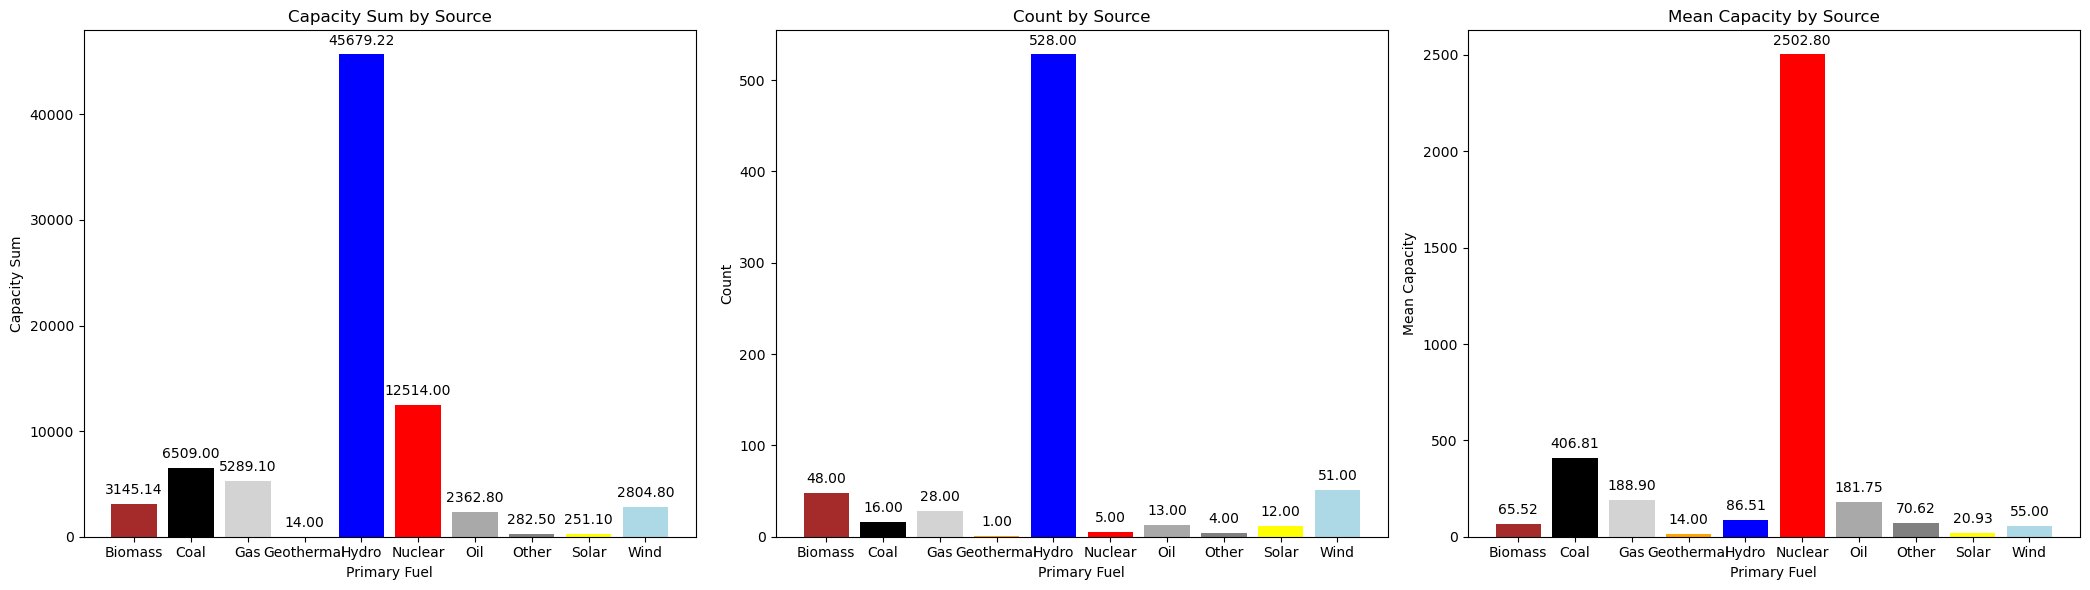

,Mean Capacity (MW),Count,Total Capacity (MW)
primary_fuel,,,
Hydro,86.513674,528,45679.22
Nuclear,2502.800000,5,12514.00
Coal,406.812500,16,6509.00
Gas,188.896429,28,5289.10
Biomass,65.523750,48,3145.14
Wind,54.996078,51,2804.80
Oil,181.753846,13,2362.80
Other,70.625000,4,282.50
Solar,20.925000,12,251.10


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your energy_cleaned DataFrame is already defined

# Your code where you perform group by operation
grouped_fuel = energy_cleaned.groupby('primary_fuel')

# Aggregated dataframes
cap_by_source_sum = grouped_fuel['capacity_in_MW'].sum()
cap_by_source_count = grouped_fuel['capacity_in_MW'].count()
cap_by_source_mean = grouped_fuel['capacity_in_MW'].mean()

fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Define colors for each fuel type
color_dict = {'Biomass': 'brown', 
              'Coal': 'black', 
              'Gas': 'lightgray', 
              'Geothermal': 'orange', 
              'Nuclear': 'red',
              'Other': 'gray',
              'Wind': 'lightblue',
              'Solar': 'yellow',
              'Hydro': 'blue',
              'Oil' : 'darkgray'
              }

# Creating the 'sum' bar chart
axes[0].bar(cap_by_source_sum.index, cap_by_source_sum, color=[color_dict[x] for x in cap_by_source_sum.index])
axes[0].set_title('Capacity Sum by Source')
axes[0].set_xlabel('Primary Fuel')
axes[0].set_ylabel('Capacity Sum')
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Creating the 'count' bar chart
axes[1].bar(cap_by_source_count.index, cap_by_source_count, color=[color_dict[x] for x in cap_by_source_count.index])
axes[1].set_title('Count by Source')
axes[1].set_xlabel('Primary Fuel')
axes[1].set_ylabel('Count')
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Creating the 'mean' bar chart
axes[2].bar(cap_by_source_mean.index, cap_by_source_mean, color=[color_dict[x] for x in cap_by_source_mean.index])
axes[2].set_title('Mean Capacity by Source')
axes[2].set_xlabel('Primary Fuel')
axes[2].set_ylabel('Mean Capacity')
for p in axes[2].patches:
    axes[2].annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Display the plot
plt.tight_layout()
plt.show()

combined_table = pd.concat([cap_by_source_mean, cap_by_source_count, cap_by_source_sum ], axis=1)
combined_table.columns = ['Mean Capacity (MW)', 'Count', 'Total Capacity (MW)']

combined_table.sort_values(by='Total Capacity (MW)', ascending=False)

### Sum,  mean and count grouped by country and capacity

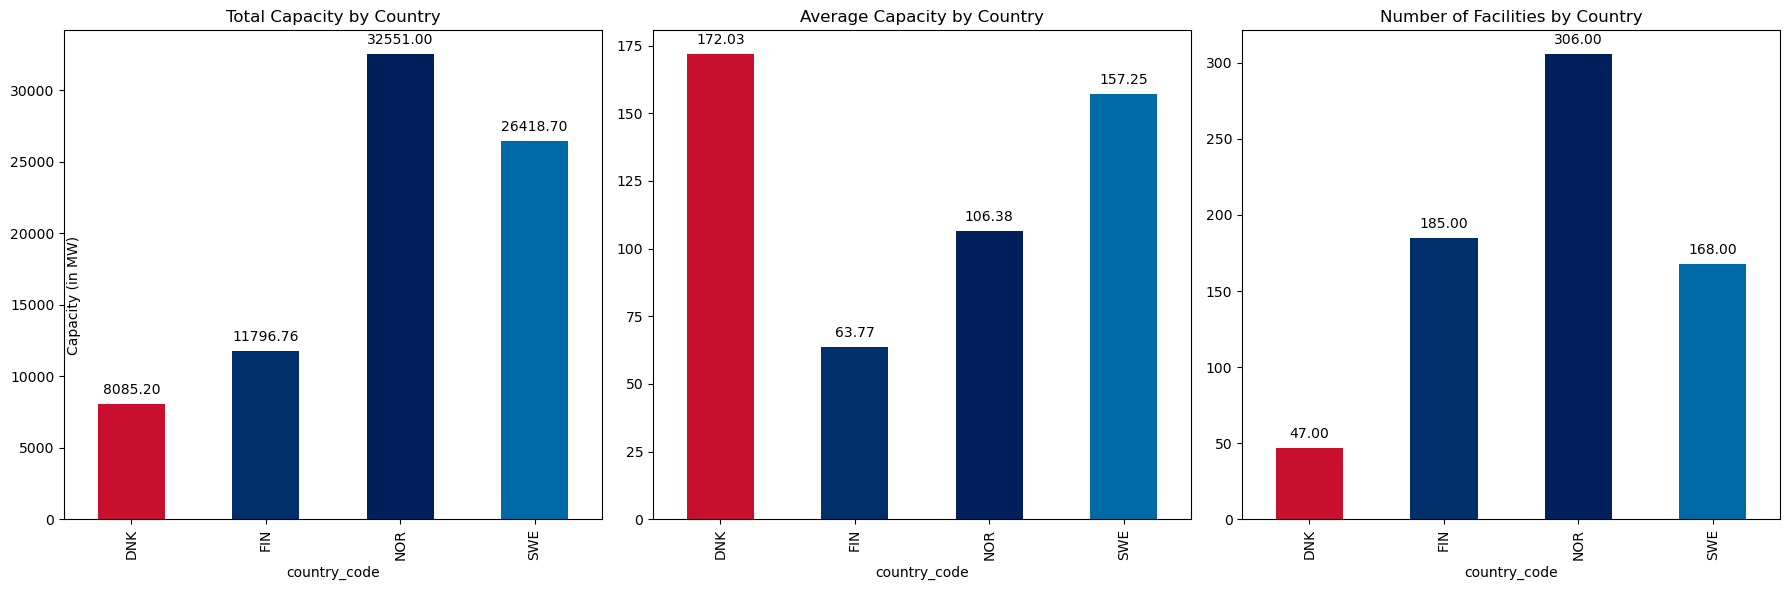

,Mean Capacity (MW),Count,Total Capacity (MW)
country_code,,,
NOR,106.375817,306,32551.00
SWE,157.254167,168,26418.70
FIN,63.766270,185,11796.76
DNK,172.025532,47,8085.20


In [29]:
# Group by 'country_code' column
grouped_country = energy_cleaned.groupby('country_code')

# Creating new aggregated dataframes for data exploration
cap_sum = grouped_country["capacity_in_MW"].sum()
cap_mean = grouped_country["capacity_in_MW"].mean()
cap_count = grouped_country["capacity_in_MW"].count()

# Define a color for each country
colors = {'DNK': '#C8102E', 'FIN': '#002F6C','SWE': '#006AA7', 'NOR': '#00205B'}

# Set up the figure and axis
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Plot the sum, mean and count with specific colors
cap_sum.plot(kind="bar", ax=axs[0], title="Total Capacity by Country", color=[colors.get(x, '#333333') for x in cap_sum.index])
cap_mean.plot(kind="bar", ax=axs[1], title="Average Capacity by Country", color=[colors.get(x, '#333333') for x in cap_mean.index])
cap_count.plot(kind="bar", ax=axs[2], title="Number of Facilities by Country", color=[colors.get(x, '#333333') for x in cap_count.index])

# Set common labels
fig.text(0.04, 0.5, 'Capacity (in MW)', va='center', rotation='vertical')

# Adding the labels on top of each bar
for ax in axs:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

plt.tight_layout()
plt.show()

combined_table = pd.concat([cap_mean, cap_count, cap_sum], axis=1)
combined_table.columns = ['Mean Capacity (MW)', 'Count', 'Total Capacity (MW)']

combined_table.sort_values(by='Total Capacity (MW)', ascending=False)


### Energy Capacity grouped by country

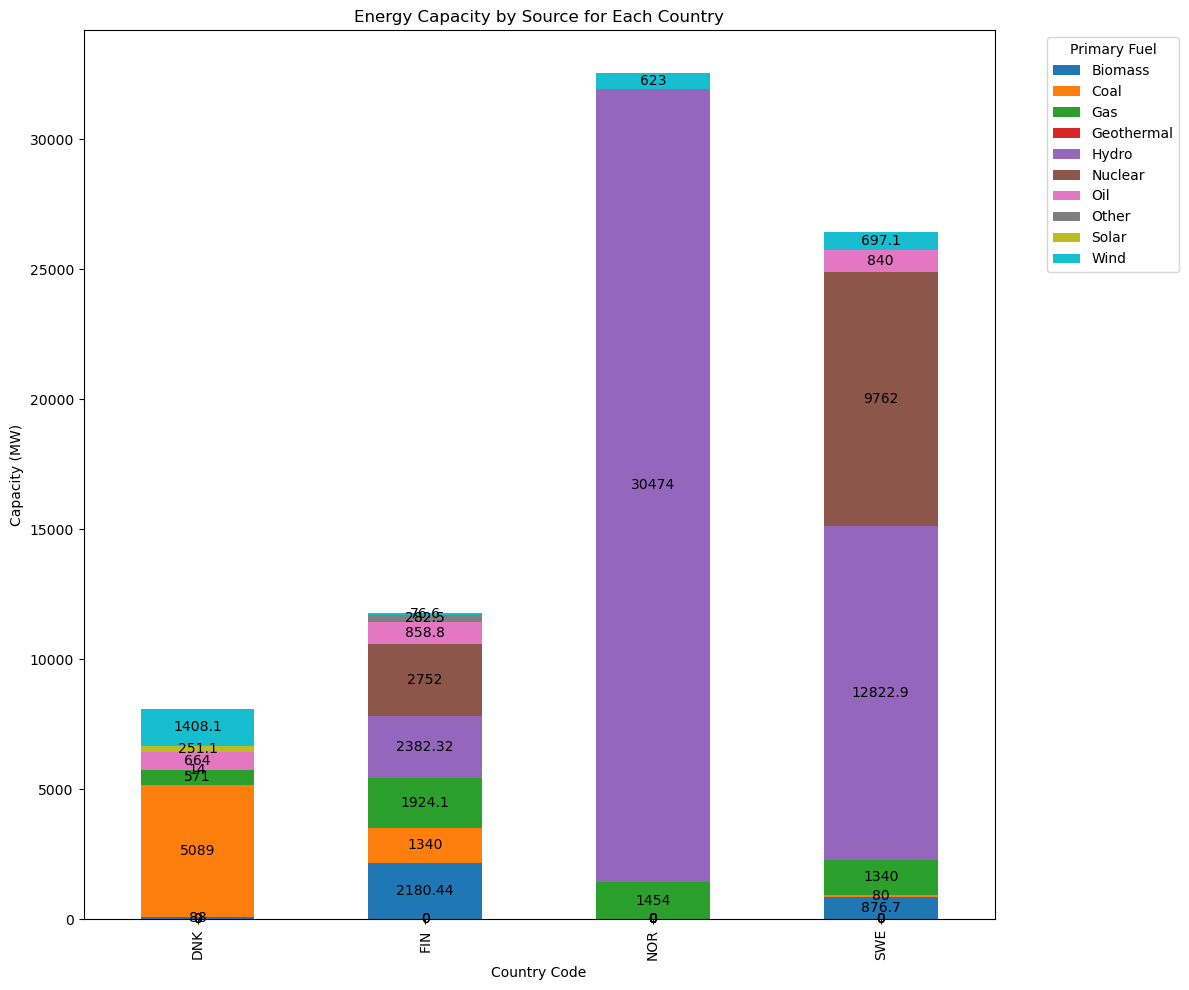

primary_fuel,Biomass,Coal,Gas,Geothermal,Hydro,Nuclear,Oil,Other,Solar,Wind
country_code,,,,,,,,,,
DNK,88.00,5089,571.0,14,0.00,0,664.0,0.0,251.1,1408.1
FIN,2180.44,1340,1924.1,0,2382.32,2752,858.8,282.5,0.0,76.6
NOR,0.00,0,1454.0,0,30474.00,0,0.0,0.0,0.0,623.0
SWE,876.70,80,1340.0,0,12822.90,9762,840.0,0.0,0.0,697.1


In [30]:
# Group by 'country_code' and 'primary_fuel' columns and calculate the sum of capacity_in_MW for each group
grouped_data = energy_cleaned.groupby(['country_code', 'primary_fuel'])['capacity_in_MW'].sum().reset_index()

# Create a pivot table to convert 'primary_fuel' categories into columns
pivot_table_data = grouped_data.pivot_table(index='country_code', columns='primary_fuel', values='capacity_in_MW', fill_value=0)

# Plot the stacked bar chart
ax = pivot_table_data.plot(kind='bar', stacked=True, figsize=(12, 10))

# Customize the plot
plt.title("Energy Capacity by Source for Each Country")
plt.xlabel("Country Code")
plt.ylabel("Capacity (MW)")

# Adding the labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.legend(title='Primary Fuel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

display(pivot_table_data)

C:\Users\viet-intel\AppData\Local\Temp\ipykernel_11656\3251440380.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  # Load world map data


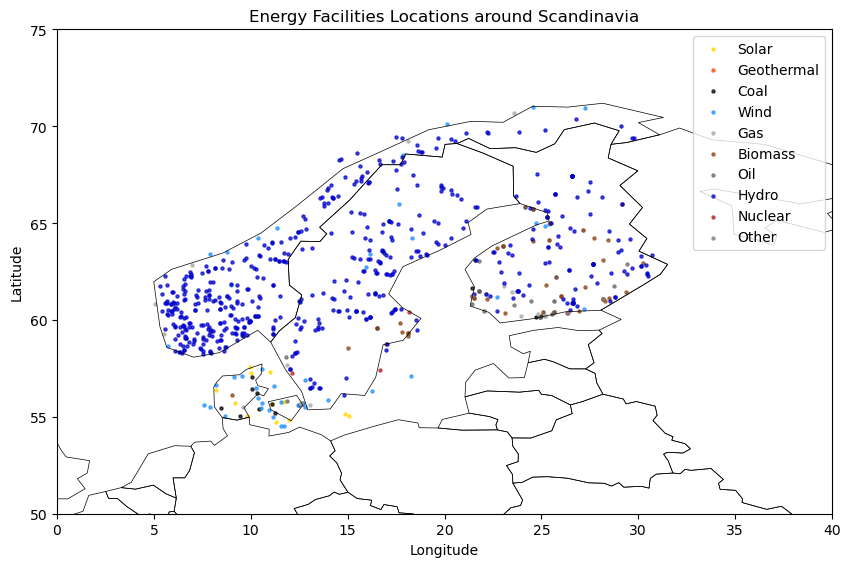

In [31]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(energy_cleaned, geometry=gpd.points_from_xy(energy_cleaned.longitude, energy_cleaned.latitude))

# Plot the scatter plot on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  # Load world map data

# Set up the figure and axis
fuel_colors = {
    'Biomass': '#8B4513',  # Saddle Brown
    'Coal': '#000000',  # Black
    'Gas': '#A9A9A9',  # Dark Gray
    'Geothermal': '#FF4500',  # Orange Red
    'Nuclear': '#B22222',  # Firebrick Red
    'Other': '#808080',  # Gray
    'Wind': '#1E90FF',  # Dodger Blue
    'Solar': '#FFD700',  # Gold
    'Hydro': '#0000CD',  # Medium Blue
    'Oil' : '#696969'  # Dim Gray
}


# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the world map
world.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Iterate over the unique categories of primary fuel
for fuel_type in gdf['primary_fuel'].unique():
    # Plot each primary fuel with its corresponding color
    gdf[gdf['primary_fuel'] == fuel_type].plot(ax=ax, markersize=5, color=fuel_colors[fuel_type], alpha=0.7, label=fuel_type)

# Set the limits to a wider region (these are approximate)
plt.xlim(0, 40)  # Longitude range
plt.ylim(50, 75)  # Latitude range

# Customize the plot
plt.title("Energy Facilities Locations around Scandinavia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add a legend to the plot
plt.legend(loc='upper right')

plt.show()


### Owner of plant

In [32]:
# Group by owner of plant and sum the capacity_in_MW
df_group = energy_cleaned.groupby('owner of plant')

sum_capacity = df_group['capacity_in_MW'].sum()

sum_capacity

owner of plant
10.6% Statkraft      61.0
100% Statkraft      942.4
100% Vattenfall    8307.3
50% Vattenfall      103.4
50% Ørsted          399.6
                    ...  
Vindenergi Aps       23.0
Voimavasu Oy         13.5
Wirsol Solar AG      61.0
Yara Suomi Oy        14.2
Ørsted             3428.0
Name: capacity_in_MW, Length: 110, dtype: float64

country_long
Denmark    13
Finland    85
Norway      0
Sweden     13
Name: owner of plant, dtype: int64


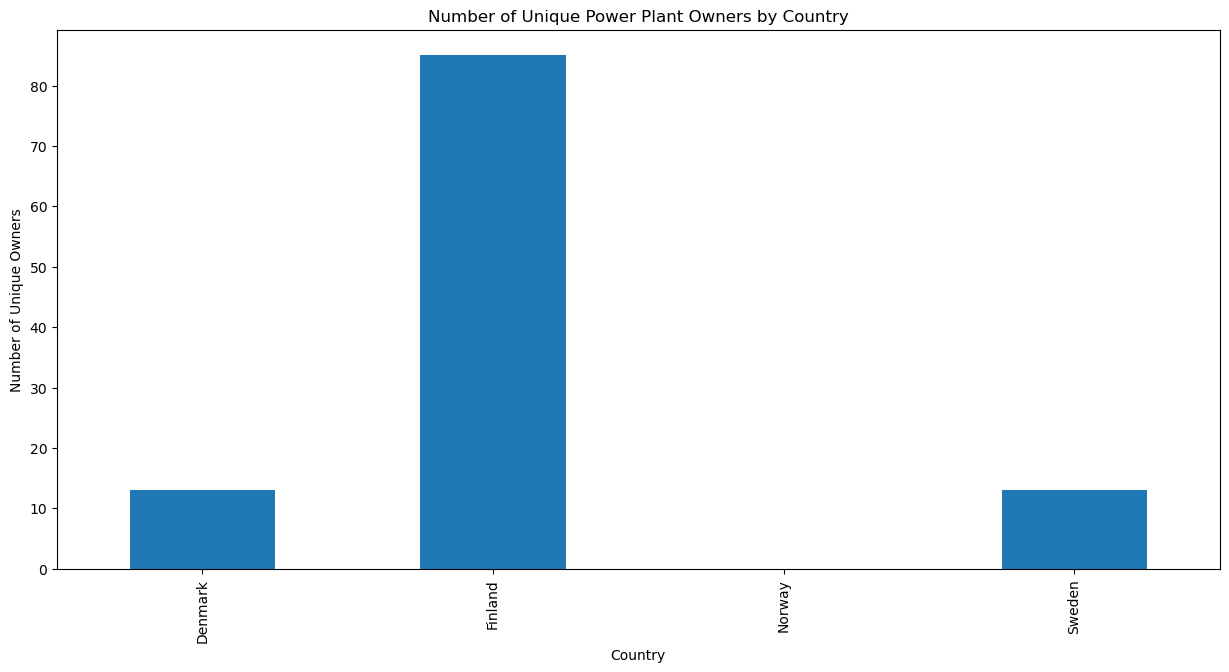

In [33]:
# Group by country and count the number of unique power plant owners
unique_owners_per_country = energy_cleaned.groupby('country_long')['owner of plant'].nunique()

# Print the result
print(unique_owners_per_country)

# Plot the counts as a bar plot
unique_owners_per_country.plot(kind='bar', figsize=(15, 7))

plt.title('Number of Unique Power Plant Owners by Country')
plt.xlabel('Country')
plt.ylabel('Number of Unique Owners')

plt.show()


## Load as csv and to sql

In [34]:
# Save the DataFrame to a CSV file
# final_dataframe.to_csv(r'C:\Users\viet-intel\orsted_projekt\data\output\final_dataframe.csv', index=False) 


In [35]:
"""
import mysql.connector
from sqlalchemy import create_engine, types
from math import ceil

# MySQL connection setup
username = 'root'
password = '1234'
host = 'localhost'
database = 'orsted'

engine_str = f"mysql+mysqlconnector://{username}:{password}@{host}/{database}"
engine = create_engine(engine_str)

# Fetching the dtypes for each column
dtype_dict = final_dataframe.dtypes.map(lambda x: types.TEXT 
                                  if x == "object" 
                                  else types.Float(precision=3, asdecimal=True) 
                                  if x == "float" 
                                  else types.Integer()).to_dict()

# Create table if doesn't exist
final_dataframe[:0].to_sql('powerplants_data', con=engine, if_exists='replace', dtype=dtype_dict)

# Upload data in chunks
n = 1000  # chunk row size
total_chunks = ceil(len(final_dataframe) / n)

for i in range(total_chunks):
    print(f'Uploading chunk {i+1}/{total_chunks}...')
    final_dataframe[i*n:(i+1)*n].to_sql('powerplants_data', con=engine, if_exists='append', dtype=dtype_dict)
    
print("Upload complete.")
"""


Uploading chunk 1/1...
Upload complete.


## Colors

| Energy Source | Hex Code | Color |
|---------------|----------|-------|
| Coal          | #654321  | <span style="color:#654321;">&#9608;</span> |
| Wind          | #0077BE  | <span style="color:#0077BE;">&#9608;</span> |
| Oil           | #363636  | <span style="color:#363636;">&#9608;</span> |
| Gas           | #007880  | <span style="color:#007880;">&#9608;</span> |
| Solar         | #FFD700  | <span style="color:#FFD700;">&#9608;</span> |
| Biomass       | #AACC00  | <span style="color:#AACC00;">&#9608;</span> |
| Geothermal    | #FF4500  | <span style="color:#FF4500;">&#9608;</span> |
| Hydro         | #003A5D  | <span style="color:#003A5D;">&#9608;</span> |
| Nuclear       | #CE0000  | <span style="color:#CE0000;">&#9608;</span> |
| Other       | #999999  | <span style="color:#999999;">&#9608;</span> |
